# Exercise 4: Multivariate analysis

For this exercise we recommend using [SciKit-Learn](https://scikit-learn.org/stable/index.html)

## Machine Learning for the $\tau^-\to\mu^-\mu^+\mu^-$ search at LHCb

The LHCb experiment at CERN is able to search for exotic decays of the $\tau$ lepton to three muons. This process is fobidden in the Standard Model but is predicted to be sizeable in several theories beyond the Standard Model.

Your goal is to maximise the chances to find this decay in the dataset collected by LHCb using a Machine Learning technique to classify the recorded events as signal or background.

You are given a dataset composed of labelled signal (`signal==1`) and background (`signal==0`) events. Each event is described by a set of *features* whose distribution might be different between signal and background. The goal is to train a Machine Learning classifier to guess if an event is signal or background based on these features.

Here's the list of features recorded in the dataset that you can use for the classification:
* `DecayTime` - How long the $\tau$ candidate existed before decaying.
* `IP` - [Impact parameter](https://en.wikipedia.org/wiki/Impact_parameter) of the $\tau$ candidate and the collision point.
* `VertexChi2` - The $\chi^2$ of a fit to locate the $\tau$ decay vertex.
* `pt` - Transverse momentum of the $\tau$.
* `DOCAone` - Distance of closest approach between first and second muons.
* `DOCAtwo` - Distance of closest approach between second and third muons.
* `DOCAthree` - Distance of closest approach between first and third muons.
* `isolationa` - Track isolation variable.
* `isolationb` - Track isolation variable.
* `isolationc` - Track isolation variable.
* `p0_pt` - Transverse momentum of the first muon.
* `p1_pt` - Transverse momentum of the second muon.
* `p2_pt` - Transverse momentum of the third muon.
* `p0_IP` - Impact parameter of the first muon.
* `p1_IP` - Impact parameter of the second muon.
* `p2_IP` - Impact parameter of the third muon.

In [2]:
import pandas as pd
d = pd.read_csv('training_reduced.csv')


1. Calculate the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) between signal and background for each of the features of the dataset. The test evaluates how likely are two data samples to be drawn from the same PDF, and therefore should be larger for the features that are most powerful to discriminate signal and background.

*Hint:* you can use the [`ks_2samp` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) from `scipy.stats` to compute the Kolmogorov-Smirnov test between two samples

*Hint:* you can get the list of features from the DataFrame column headings, i.e. `d.keys()`

In [3]:
from scipy.stats import ks_2samp
#help(ks_2samp)
keys = d.keys()
for key in keys:
    # print(d[key][d["signal"] == 0])
    print(key)
    print(ks_2samp(d[key][d["signal"] == 0], d[key][d["signal"] == 1]))

signal
KstestResult(statistic=1.0, pvalue=0.0)
LifeTime
KstestResult(statistic=0.14423987132737376, pvalue=2.5633875826106553e-290)
IP
KstestResult(statistic=0.5503323429451006, pvalue=0.0)
VertexChi2
KstestResult(statistic=0.28567312506181025, pvalue=0.0)
pt
KstestResult(statistic=0.1377976891036844, pvalue=6.7965246029508e-265)
DOCAone
KstestResult(statistic=0.15488706886849868, pvalue=0.0)
DOCAtwo
KstestResult(statistic=0.15537702908242712, pvalue=0.0)
DOCAthree
KstestResult(statistic=0.14469064866972225, pvalue=3.8510728182137147e-292)
isolationa
KstestResult(statistic=0.24067798381021005, pvalue=0.0)
isolationb
KstestResult(statistic=0.16782063583131873, pvalue=0.0)
isolationc
KstestResult(statistic=0.1686414213935396, pvalue=0.0)
p0_pt
KstestResult(statistic=0.10270530235899855, pvalue=4.5061441238451737e-147)
p1_pt
KstestResult(statistic=0.1370815349196095, pvalue=3.850658338917715e-262)
p2_pt
KstestResult(statistic=0.039081124813342416, pvalue=1.2683241258042925e-21)
p0_IP
Kste

2. The least and most discriminating features are the ones with the lowest and highest Kolmogorov-Smirnov scores, respectively. Compare the signal and background distributions for these two features.

**NB:** please do not use the label `signal` as a feature!

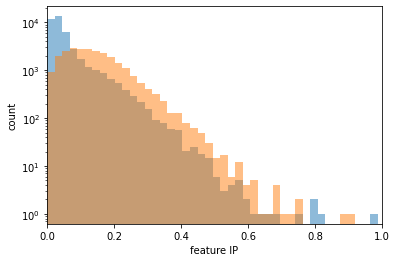

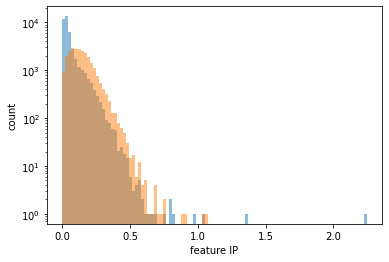

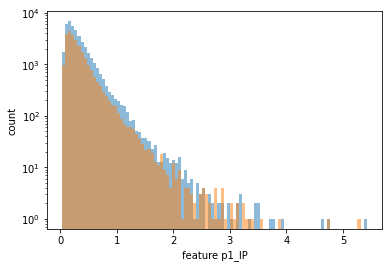

In [4]:
# highest is IP
#lowest p1_IP

import matplotlib.pyplot as plt

_,bins , _= plt.hist(d["IP"][d["signal"] == 1], alpha = 0.5, bins = 100)
plt.hist(d["IP"][d["signal"] == 0], alpha = 0.5, bins = bins)
# plt.hist(d["p1_IP"], alpha = 0.5)
plt.yscale("log")
plt.xlim((0,1))
plt.ylabel("count")
plt.xlabel("feature IP")
plt.show()
_,bins , _= plt.hist(d["IP"][d["signal"] == 1], alpha = 0.5, bins = 100)
plt.hist(d["IP"][d["signal"] == 0], alpha = 0.5, bins = bins)
# plt.hist(d["p1_IP"], alpha = 0.5)
plt.yscale("log")
plt.ylabel("count")
plt.xlabel("feature IP")
plt.show()

_,bins , _= plt.hist(d["p1_IP"][d["signal"] == 1], alpha = 0.5, bins = 100) #not a good way to get the same bins
plt.hist(d["p1_IP"][d["signal"] == 0], alpha = 0.5, bins = bins)
# plt.hist(d["p1_IP"], alpha = 0.5)
plt.yscale("log")
plt.ylabel("count")
plt.xlabel("feature p1_IP")
plt.show()

3. Split the dataset *randomly* in two halves: we will use one half for training our classifier and the other half to test it.

*Hint:* you can use the function `train_test_split` from `sklearn.model_selection`

**NB:** the dataset is ordered by `signal`, hence the need for random splitting.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d.drop("signal", axis=1), d["signal"], test_size = 0.5)

# print(X_train)
print(y_test)

29164    1
26587    1
35989    1
67220    1
2448     0
        ..
22574    0
49166    1
23273    0
27469    1
7144     0
Name: signal, Length: 33777, dtype: int64


4.

i. Train a [Gaussian naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html) on the training sample using the three features of your choice (possibly the most discriminant ones). You can use [`GaussianNB` from `sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train[["IP","VertexChi2", "isolationa"]], y_train)

gnb.predict([[0.23, 0.24, 23]])

/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

ii. Now train a [gradient-boosted decision tree (GBDT)](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) on the training sample using the same three features. You can use [`GradientBoostingClassifier` from `sklearn.ensemble`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier().fit(X_train[["IP","VertexChi2", "isolationa"]], y_train)

gbc.predict([[0.23, 0.24, 23]])


/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

5. Calculate the classifier responses on both the training and testing samples and overlay histograms of the response for signal and background.

*Hint:* to evaluate the response use `gbdt.decision_function()` and `gnb.predict_proba()`

*Hint:* the `predict_proba()` function will return a 2D array: background & signal probabilities for each point in the sample. You can call `predict_proba(...)[:,0]` or `predict_proba(...)[:,1]` to obtain just the signal score.

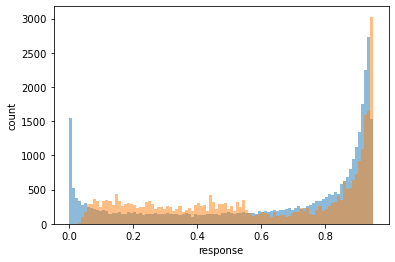

In [8]:
gnbDecision = gnb.predict_proba(X_test[["IP","VertexChi2", "isolationa"]])


gbcPredict = gbc.predict_proba(X_test[["IP","VertexChi2", "isolationa"]])

# print(gnb.predict(X_test[["IP","VertexChi2", "isolationa"]]))
# print(gnbDecision) # [0 1]
# print(gbcPredict)

_, bins,_ = plt.hist(gnbDecision[:,1], alpha = 0.5, bins = 100)
plt.hist(gbcPredict[:,1], bins=bins, alpha = 0.5)
plt.xlabel("response")
plt.ylabel("count")
plt.show()

6. Check if there is overtraining by performing a Kolmogorov-Smirnov test on the classifier responses between the training and testing sample. If you did not overtrain the classifier, its response should be the same on the training and testing samples both for signal and for background. Therefore the K-S scores should be small (~0.01).

In [9]:
gnbDecisionTrain = gnb.predict_proba(X_train[["IP","VertexChi2", "isolationa"]])


gbcPredictTrain = gbc.predict_proba(X_train[["IP","VertexChi2", "isolationa"]])


ks_gnb = ks_2samp(gnbDecision[:,1],gnbDecisionTrain[:,1])
ks_gbc = ks_2samp(gbcPredict[:,1],gbcPredictTrain[:,1])

print(ks_gnb)
print(ks_gbc)

KstestResult(statistic=0.005905157972679764, pvalue=0.5958376988488637)
KstestResult(statistic=0.0068854078622814785, pvalue=0.39818645193475743)


7. Show the performance of your classifiers with a ROC curve. Plot the ROC curves on the same plot and label the axes.

*Hint:* you can use the function `roc_curve` from `sklearn.metrics`

In [23]:
from sklearn.metrics import roc_curve
help(roc_curve)

rocgnb = roc_curve(y_test, gnb.predict_proba(X_test[["IP","VertexChi2", "isolationa"]]) , pos_label=1, drop_intermediate = False)
rocgbc = roc_curve(y_test, gbc.predict_proba(X_test[["IP","VertexChi2", "isolationa"]]) , pos_label=1, drop_intermediate = False)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

Text(0, 0.5, 'efficiency')

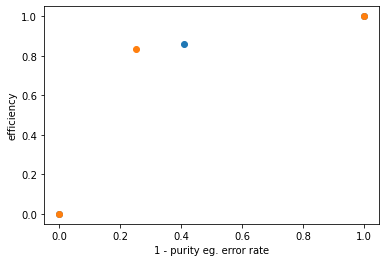

In [24]:
plt.scatter(rocgnb[0], rocgnb[1])
plt.scatter(rocgbc[0],rocgbc[1])
plt.xlabel("1 - purity eg. error rate")
plt.ylabel("efficiency")

**Bonus**: Try to improve the performance of your classifier by including more features and changing the initialisation options of the `GradientBoostingClassifier` object.